# PRACTICA 8

Julián Mauricio Sánchez Ceballos
1001132830

Departamento de Ingeniería Electrónica y de Telecomunicaciones. 
Universidad de Antioquia.


In [ ]:
%pip install numpy -q
%pip install matplotlib -q
%pip install scipy -q
%pip install pandas -q



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.io.wavfile import read
from IPython.display import Audio

import warnings
warnings.simplefilter("ignore")

## 1. TRANSFORMADA DE FOURIER DE TIEMPO DE CORTO - ESPECTROGRAMAS.

1. Cargue, normalice, grafique y escuche las señales compartidas (senal1.wav y senal2.wav).

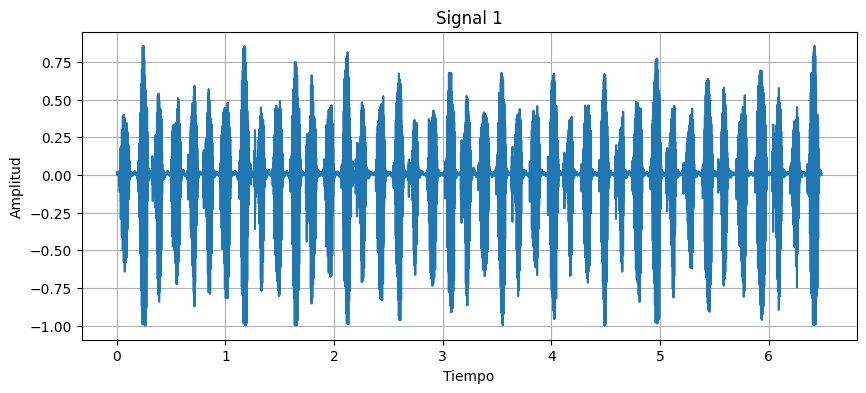

In [12]:
fs1, signal1 = read("senal1.wav")

x1 = signal1/float(np.max(abs(signal1)))
t1 = np.arange(0, float(len(x1))/fs1, 1.0/fs1)


plt.figure(figsize=(10, 4))
plt.plot(t1, x1)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Signal 1')
plt.grid()
plt.show()

audio = Audio(x1, rate=fs1)
display(audio)


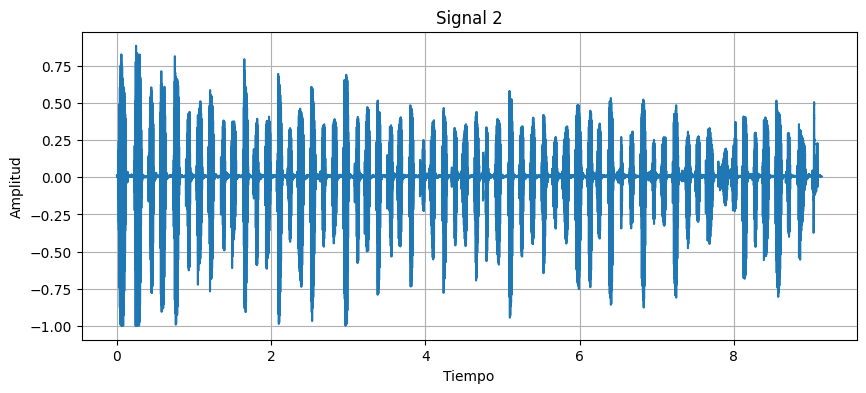

In [15]:
fs2, signal2 = read("senal2.wav")

x2 = signal2/float(np.max(abs(signal2)))
t2 = np.arange(0, float(len(x2))/fs2, 1.0/fs2)


plt.figure(figsize=(10, 4))
plt.plot(t2, x2)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Signal 2')
plt.grid()
plt.show()

audio = Audio(x2, rate=fs2)
display(audio)

## 1.3 Extracción de segmentos 

También llamado enventanado y es el proceso mediante el cual se segmenta una señal en N ventanas para luego aplicarle la STFT. Use la función mostrada a continuación y segmente su señal con un tamaño de ventana de 40 ms. Para este punto elija solo una de las dos señales.

In [18]:
def extraer_ventanas(signal, size, fs):
    #Tamano de paso
    step=int(0.010*fs)
    n_seg = int((len(signal) - size) / step)
    # extraer segmentos
    windows = [signal[i * step : i * step + size]
    for i in range(n_seg)]
    # stack (cada fila es una ventana)
    return np.vstack(windows)

Numero de ventanas:644


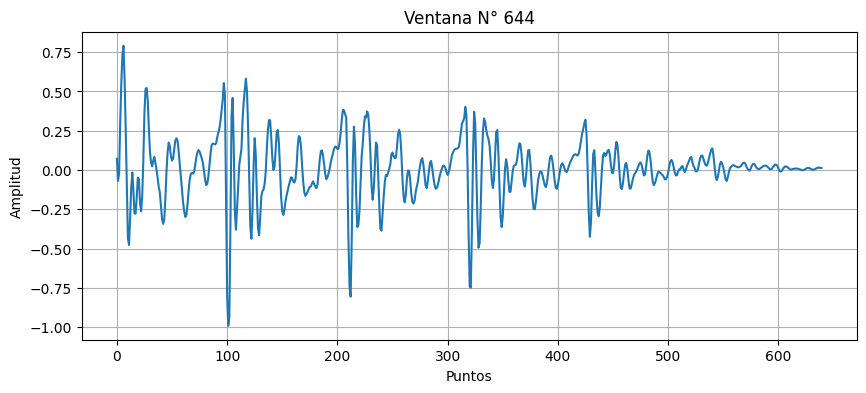

In [ ]:
window_size = int(0.04*fs1)
windows1 = extraer_ventanas(x1, window_size, fs1)

print(f"Numero de ventanas:{windows1.shape[0]}")


plt.figure(figsize=(10, 4))
plt.plot(windows1[643])     # Grafica la ventana 124
plt.xlabel('Puntos')
plt.ylabel('Amplitud')
plt.title('Ventana N° 644')
plt.grid()
plt.show()

## 1.4.Aplicación de ventanas

Existen diferentes tipos de ventanas como Hamming, Hanning, Blackman, a través de las cuales se puede establecer
el grado de resolución tanto de tiempo como de frecuencia que se desee. Si la ventana es muy angosta analizaremos
una porción muy pequeña de la señal lo que nos permite tener una buena resolución en tiempo, pero una mala
resolución en frecuencia, ya que conoceremos solo una mı́nima fracción del espectro total de la señal. Por otro lado,
si la ventana es muy ancha tendremos una buena resolución en frecuencia pero una mala resolución en tiempo.
1. Consulte como se construye y se aplica una ventana Hamming a una señal. ¿Qué tamaño de ventana debe usar?
2. Aplique la ventana construida para cada uno de los segmentos extraı́dos anteriormente.
3. Usando un subplot, grafique un segmento antes y después de aplicarle la ventana Hanning. ¿Observa alguna diferencia? Explique.

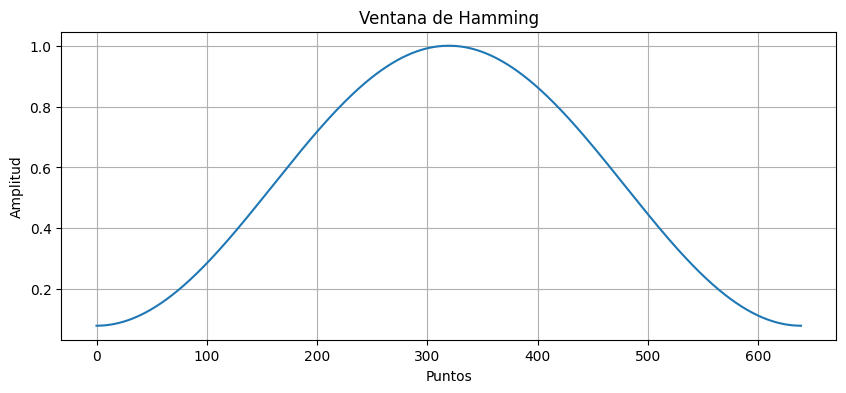

In [26]:
hamming = np.hamming(window_size)     # Mismo tamaño de ventana

plt.figure(figsize=(10, 4))
plt.plot(hamming)     # Grafica la ventana 124
plt.xlabel('Puntos')
plt.ylabel('Amplitud')
plt.title('Ventana de Hamming')
plt.grid()
plt.show()


Debe tener el mismo numero de tamaños de cada ventana, en este caso $0.04*f_s$ 

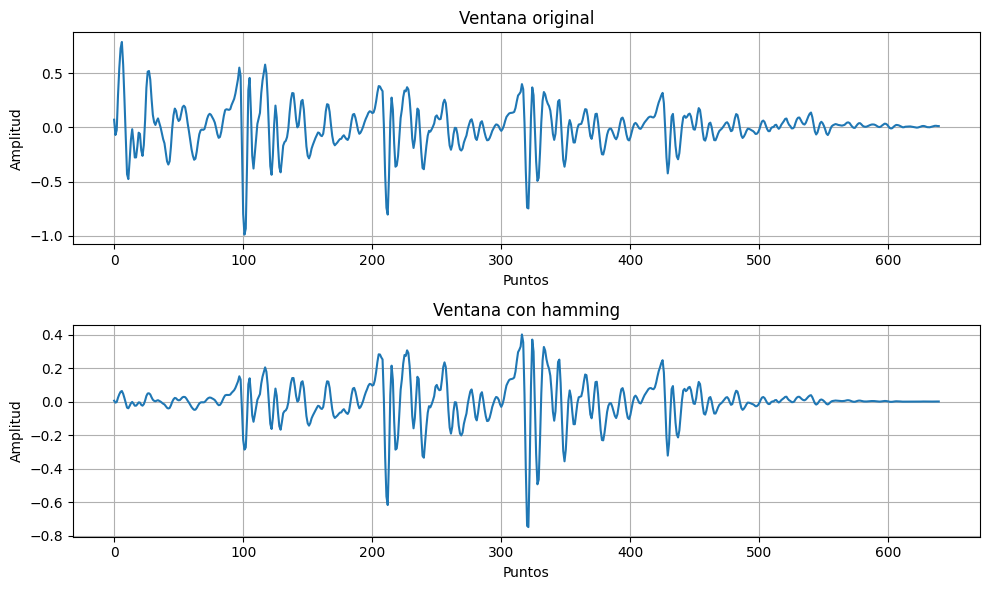

In [28]:
window_hamming = windows1 * hamming

plt.figure(figsize=(10, 6))

plt.subplot(2,1,1)
plt.plot(windows1[643])     
plt.xlabel('Puntos')
plt.ylabel('Amplitud')
plt.title('Ventana original')
plt.grid()

plt.subplot(2,1,2)
plt.plot(window_hamming[643])     
plt.xlabel('Puntos')
plt.ylabel('Amplitud')
plt.title('Ventana con hamming')
plt.grid()


plt.tight_layout()
plt.show()

Es posible observar como los bordes se atenuaron, debido a la forma de la ventana de Hamming, la prioridad la tienen los puntos de la parte central de la ventana. 

## 1.5.Aplicación de la STFT

1. Usando la siguiente función calcule la STFT a cada uno de los segmentos del ı́tem anterior, para esto use un tamaño de NFFT de 512.

In [29]:
def potspec(X, size, n_padded_min=0):
  # Zero padding
  if n_padded_min==0:
    n_padded = max(n_padded_min, int(2 ** np.ceil(np.log(size) / np.log(2))))
  else:
    n_padded = n_padded_min

  # Transformada de Fourier
  Y = np.fft.fft(X, n=n_padded)
  Y = np.absolute(Y)
  # non-redundant part

  m = int(n_padded / 2) + 1
  Y = Y[:, :m]
  Img=Y.imag
  Real=Y.real
  spec= np.sqrt(Real**2+ Img**2)

  return spec, n_padded

In [30]:
spectre, nfft = potspec(window_hamming, window_size, 512)

2. Grafique la representación tiempo-frecuencia obtenida en el ı́tem anterior. Puede ayudarse de las siguientes lı́neas de código.
3. ¿Qué puede concluir del espectrograma? ¿En qué intervalos de frecuencia está definida la señal? Explique.

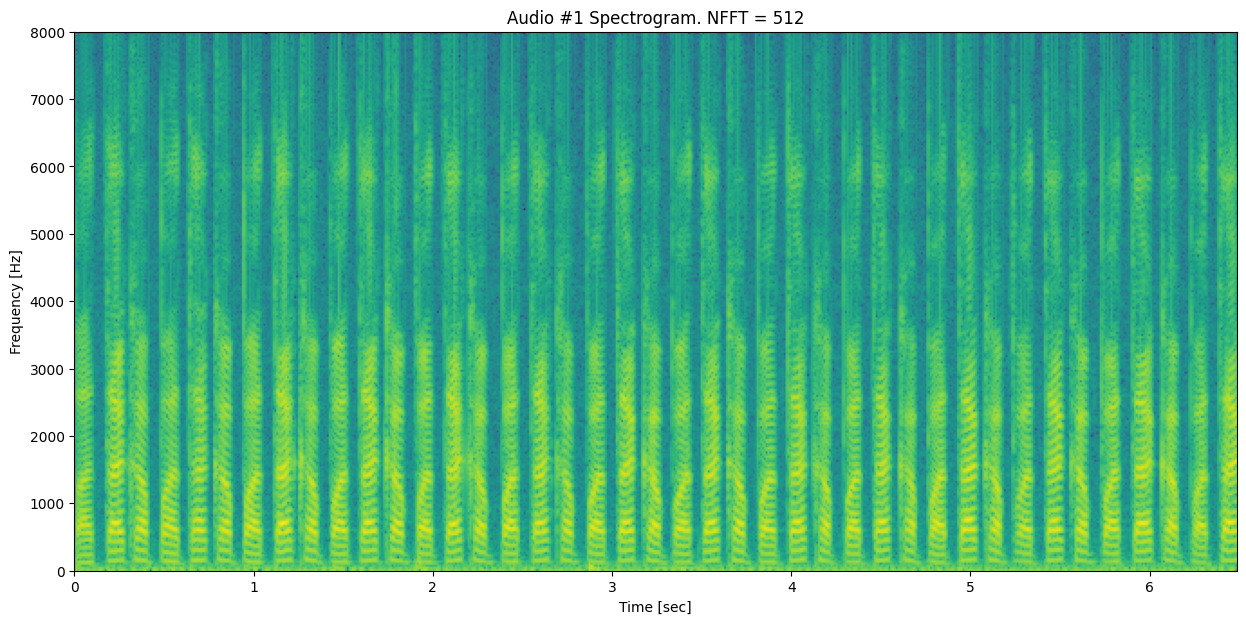

In [35]:
def plotSpectrogram(nfft):
  spectre, nfft = potspec(window_hamming, window_size, nfft)
  spectre=np.flipud(10*np.log10(spectre).T)

  %matplotlib inline
  plt.figure(figsize=(15,7))
  plt.title(f'Audio #1 Spectrogram. NFFT = {nfft}')
  plt.imshow(spectre,aspect='auto', extent=[0, len(x1)/fs1, 0, fs1//2])
  plt.ylabel('Frequency [Hz]')
  plt.xlabel('Time [sec]')
  plt.show()

plotSpectrogram(512)

En el espectrograma se obsevan las ventanas en las que se dividió la señal, las lineas paralelas multiples generadas por la división de las ventanas muestran sonidos complejos (como la voz) con varios armonicos distribuidas entre el espectro de frecuencia


4. Calcule y grafique la STFT para valores de NFFT equivalentes a 64, 1024 y 4096. ¿Qué diferencia encuentra al variar este tamaño? ¿A su criterio cuál es el tamaño de NFFT que tiene una mejor resolución tiempo-frecuencia? Explique.


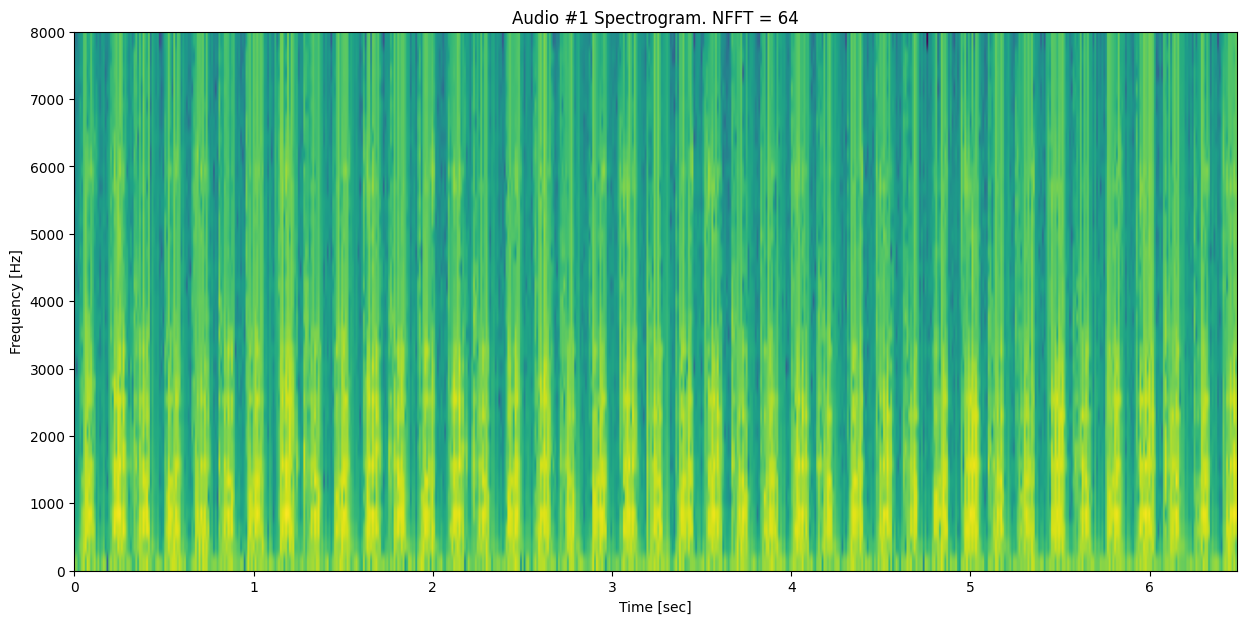

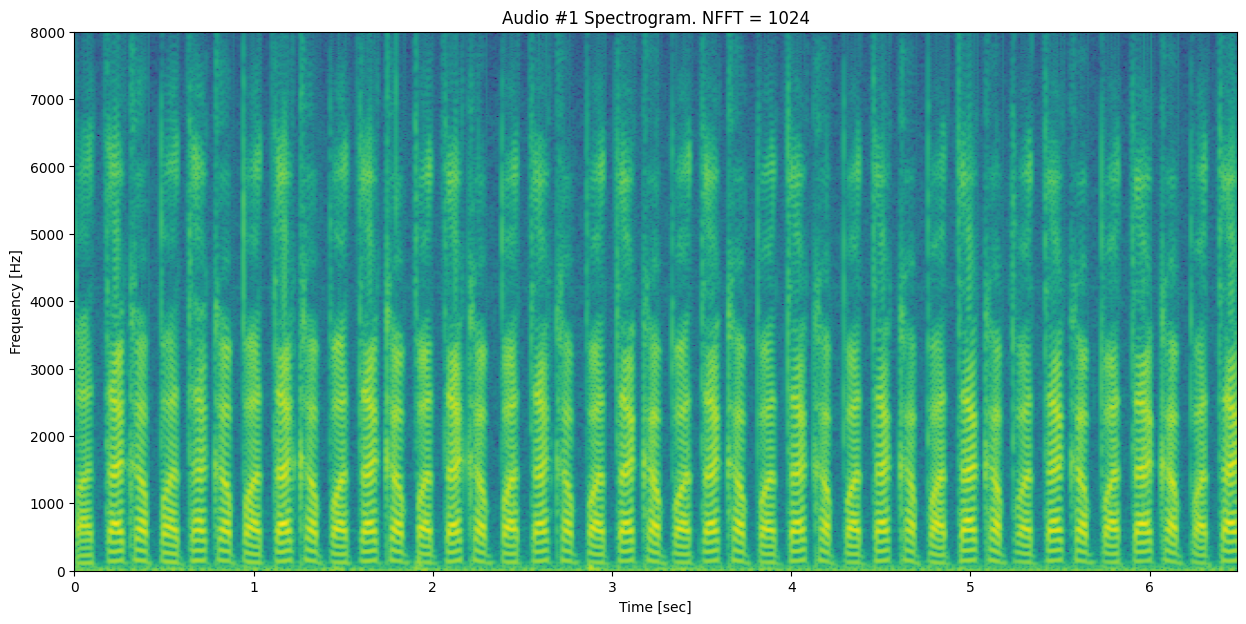

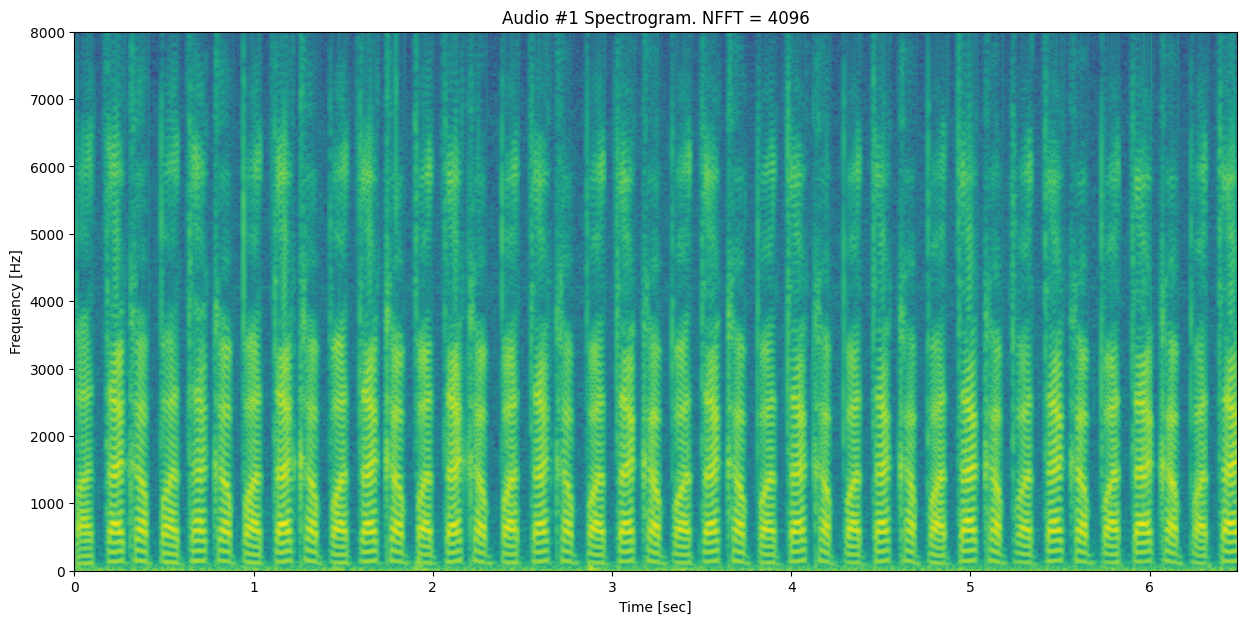

In [37]:
plotSpectrogram(64)
plotSpectrogram(1024)
plotSpectrogram(4096)

De forma analógica a lo visto en el anterior laboratorio, la NFFT influye directamente sobre la resolución del espectrograma y la distribución de energia en las frecuencias, haciendo que con una NFFT alta sea mucho mas facil apreciar las intencidades en las diferentes frecuencias. 

Para esta señal, la mejor representación se lográ con un NFFT de 1024, con esta NFFT se lográ una distribución adecuada de la energia en las diferentes frecuencias, diferente a lo que se creería, en la NFFT de 4096 ya se distribuye tanto la frecuencia que se pierden algunos picos de intensidad haciendo que sean más dificiles de observar.

5. Con la mejor resolución del numeral anterior, grafique las dos señales. ¿Qué se puede concluir? ¿En que se diferencian?


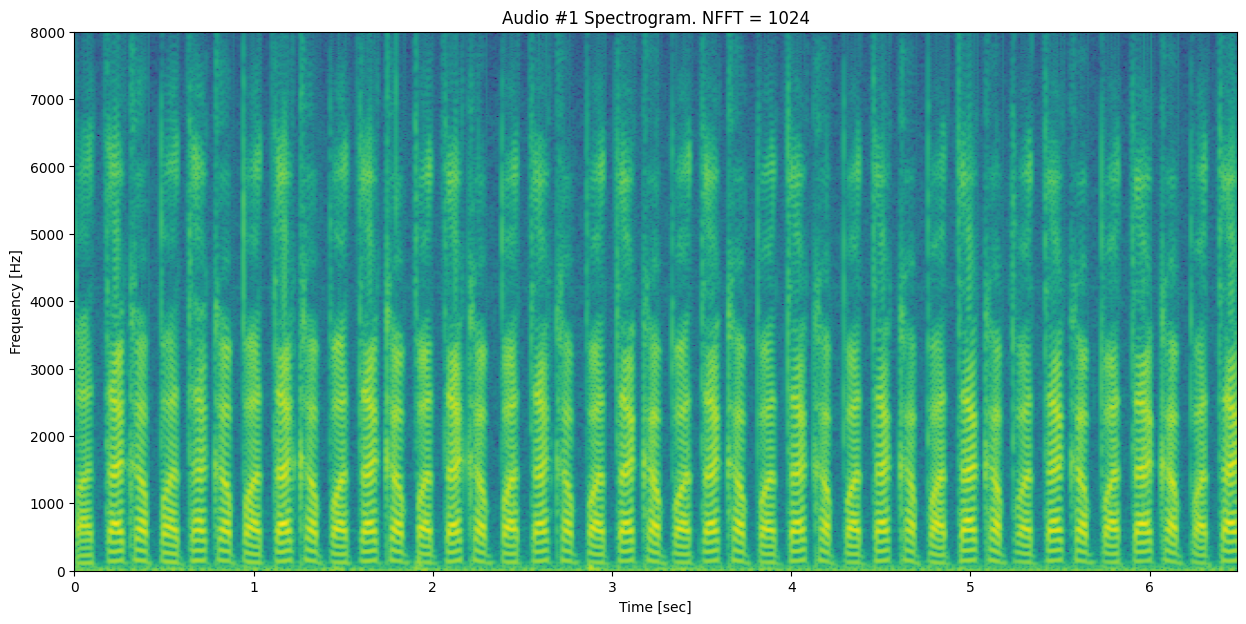

Numero de ventanas:909


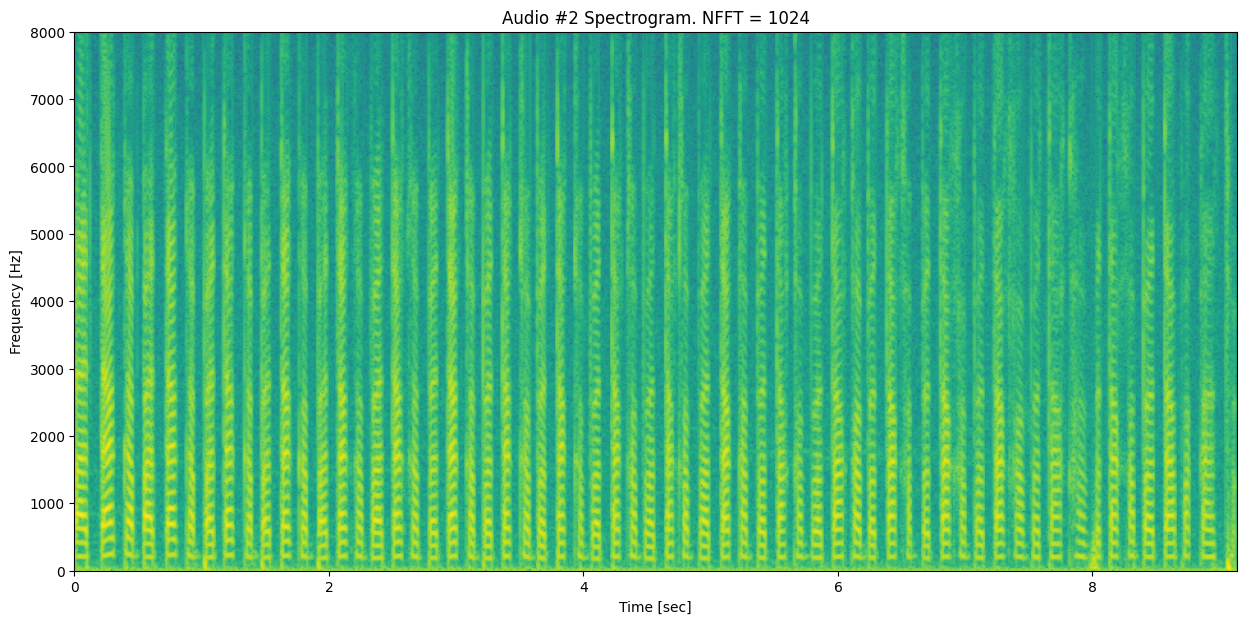

In [ ]:
plotSpectrogram(1024)

windows2 = extraer_ventanas(x2, window_size, fs2)
print(f"Numero de ventanas:{windows2.shape[0]}")

window_hamming2 = windows2 * hamming
spectre, nfft = potspec(window_hamming2, window_size, 1024)
spectre=np.flipud(10*np.log10(spectre).T)


plt.figure(figsize=(15,7))
plt.title('Audio #2 Spectrogram. NFFT = 1024')
plt.imshow(spectre,aspect='auto', extent=[0, len(x2)/fs2, 0, fs2//2])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

Una primera diferencia que se puede notar de entrada es el cambio de rango en la frecuencia, por un lado el audio 1 corresponde a un hombre hablando y esto se ve reflejado en el espectrograma, donde es precisamente el espectrograma de este audio el que tiene el rango mas pequeño, de 0 a $ 4 KHz$ aproximadamente, lo que se podría traducir que el hombre tiene un tono de voz mas grave y con menos armonicos de alta frecuencia. 

En contra parte, el segundo audio corresponde a una mujer, este espectrograma tiene componentes espectrales que van desde $0 Hz$ hasta aproximadamente $5KHz$ lo cual indica que la mujer tiene un tono de voz mas agudo y con mayor presencia de armonicos en alta frecuencia. 

## Conclusiones. 

* Los espectrogramas permiten representar una señal en el dominio tiempo-frecuencia aplicando la transformada de Fourier sobre ventanas sucesivas de la señal. Esta representación es una aplicación muy importante en el ambito de reconocimiento de audio, dada su capacidad de capturar la evolución del contenido espectrar a lo largo del tiempo.

* El enventanado es una tecnica crucial para dividir la señal en sementos analizables, se pudo observar que se introduce un efecto conocido como fugas espectrales y se presenta como el mayor inconveniente a la hora de usar esta tecnica. Para mitigar este fenomeno es posible usar tecnicas como la ventana de hamming, la cual atenua los extremos y destacan la parte central, ayudando a reducir las distorsiones en el analisis espectral.